In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import shutil
import random
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import ultralytics

from ultralytics import YOLO

img_model = YOLO("yolo11s.pt")


100%|██████████| 18.4M/18.4M [00:18<00:00, 1.05MB/s]


In [2]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124
CUDA available: True
CUDA version: 12.4
Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650 Ti
Using device: cuda


In [12]:
data_dir = os.path.join(os.getcwd(),'filtered_data_aug','data.yaml')

In [6]:
results = img_model.train(
    data = data_dir,
    epochs=10,
    batch=2,
    imgsz=640,
    name='mine_detector_iid_all_aug_local',
    pretrained=True,
    device=0,
    optimizer='auto',
    workers=2,
    verbose=True,
    seed=42,
    amp=False )


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/data.yaml, epochs=10, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=mine_detector_iid_all_aug_local2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

100%|██████████| 755k/755k [00:00<00:00, 959kB/s] 

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512, 128, 1, False]          
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

train: Scanning /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/train/labels... 13944 images, 150 backgrounds, 0 corrupt: 100%|██████████| 13944/13944 [00:14<00:00, 988.33it/s] 


train: New cache created: /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/train/labels.cache


val: Scanning /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/valid/labels... 1328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1328/1328 [00:01<00:00, 1169.71it/s]


val: New cache created: /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/valid/labels.cache


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to runs/detect/mine_detector_iid_all_aug_local2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/mine_detector_iid_all_aug_local2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.51G        2.3      2.582      1.792          2        640: 100%|██████████| 6972/6972 [22:29<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:28<00:00, 11.75it/s]

                   all       1328       1412       0.59       0.52      0.564      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       1.6G      2.189      1.892      1.732          1        640: 100%|██████████| 6972/6972 [22:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 11.95it/s]

                   all       1328       1412      0.691      0.612      0.647      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.57G      2.138      1.784      1.693          2        640: 100%|██████████| 6972/6972 [26:16<00:00,  4.42it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 11.94it/s]

                   all       1328       1412      0.716      0.634      0.696      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.59G      2.088      1.667      1.637          2        640: 100%|██████████| 6972/6972 [22:18<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.22it/s]

                   all       1328       1412      0.773      0.715      0.756      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.59G      2.034      1.558      1.606          2        640: 100%|██████████| 6972/6972 [22:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.20it/s]


                   all       1328       1412      0.765      0.746      0.767      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.59G          2      1.466      1.577          2        640: 100%|██████████| 6972/6972 [22:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.19it/s]

                   all       1328       1412      0.842      0.766      0.802      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.59G      1.957      1.402      1.555          2        640: 100%|██████████| 6972/6972 [22:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.23it/s]

                   all       1328       1412      0.806      0.767      0.799      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.59G      1.923      1.351      1.533          2        640: 100%|██████████| 6972/6972 [22:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.12it/s]

                   all       1328       1412      0.816      0.763      0.811      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.59G      1.877      1.293      1.504          2        640: 100%|██████████| 6972/6972 [22:22<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.03it/s]

                   all       1328       1412      0.834      0.811      0.831      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.59G      1.848      1.262      1.486          3        640: 100%|██████████| 6972/6972 [22:22<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.06it/s]

                   all       1328       1412      0.826      0.814      0.829      0.388



10 epochs completed in 3.867 hours.
Optimizer stripped from runs/detect/mine_detector_iid_all_aug_local2/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/mine_detector_iid_all_aug_local2/weights/best.pt, 19.2MB

Validating runs/detect/mine_detector_iid_all_aug_local2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:24<00:00, 13.48it/s]


                   all       1328       1412      0.834      0.811      0.831      0.391
             butterfly        690        690      0.826      0.798      0.824      0.386
              starfish        722        722      0.842      0.824      0.838      0.396
Speed: 0.4ms preprocess, 15.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/mine_detector_iid_all_aug_local2



0: 640x640 1 butterfly, 18.2ms
Speed: 4.1ms preprocess, 18.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Class : 0.0 Score : 0.4535530209541321


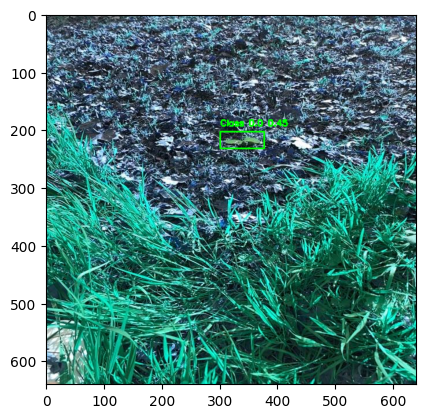

In [18]:
import cv2
img_path = os.path.join(os.getcwd(),'4.jpg')
image = cv2.imread(img_path)
model_path = os.path.join(os.getcwd(),'trained.pt')
img_model = YOLO(model_path)
results = img_model.predict(image)


for result in results:
    boxes = result.boxes.xyxy  
    scores = result.boxes.conf 
    class_ids = result.boxes.cls

    for box, score, class_id in zip(boxes, scores, class_ids):
        x1, y1, x2, y2 = map(int, box)  
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  
        label = f'Class {class_id} {score:.2f}'
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  

plt.imshow(image)
print(f"Class : {(class_ids[scores.argmax()])} Score : {scores.max()}")

In [ ]:
"""
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
[34m[1mengine/trainer: [0mtask=detect, mode=train, model=yolo11s.pt, data=/media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/data.yaml, epochs=10, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=mine_detector_iid_all_aug_local2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=None, workspace=None, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, dfl=1.5, pose=12.0, kobj=1.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, bgr=0.0, mosaic=1.0, mixup=0.0, copy_paste=0.0, copy_paste_mode=flip, auto_augment=randaugment, erasing=0.4, crop_fraction=1.0, cfg=None, tracker=botsort.yaml, save_dir=runs/detect/mine_detector_iid_all_aug_local2
Downloading https://ultralytics.com/assets/Arial.ttf to '/home/abhinand/.config/Ultralytics/Arial.ttf'...
100%|██████████| 755k/755k [00:00<00:00, 959kB/s] Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           

  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512, 128, 1, False]          
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1    345472  ultralytics.nn.modules.block.C3k2            [384, 256, 1, False]          
 20                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1    820182  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
YOLO11s summary: 319 layers, 9,428,566 parameters, 9,428,550 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
[34m[1mtrain: [0mScanning /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/train/labels... 13944 images, 150 backgrounds, 0 corrupt: 100%|██████████| 13944/13944 [00:14<00:00, 988.33it/s] 
[34m[1mtrain: [0mNew cache created: /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/train/labels.cache
[34m[1mval: [0mScanning /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/valid/labels... 1328 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1328/1328 [00:01<00:00, 1169.71it/s]
[34m[1mval: [0mNew cache created: /media/abhinand/Abhi/Abhi/Documents/IITMadras/IBOT/Mine_Detection_model/yolo/filterer_data_aug/valid/labels.cache
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Plotting labels to runs/detect/mine_detector_iid_all_aug_local2/labels.jpg... 
[34m[1moptimizer:[0m 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
[34m[1moptimizer:[0m AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to [1mruns/detect/mine_detector_iid_all_aug_local2[0m
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/10      1.51G        2.3      2.582      1.792          2        640: 100%|██████████| 6972/6972 [22:29<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:28<00:00, 11.75it/s]                   all       1328       1412       0.59       0.52      0.564      0.241


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/10       1.6G      2.189      1.892      1.732          1        640: 100%|██████████| 6972/6972 [22:23<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 11.95it/s]                   all       1328       1412      0.691      0.612      0.647      0.271


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/10      1.57G      2.138      1.784      1.693          2        640: 100%|██████████| 6972/6972 [26:16<00:00,  4.42it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 11.94it/s]                   all       1328       1412      0.716      0.634      0.696      0.309


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/10      1.59G      2.088      1.667      1.637          2        640: 100%|██████████| 6972/6972 [22:18<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.22it/s]                   all       1328       1412      0.773      0.715      0.756      0.328


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/10      1.59G      2.034      1.558      1.606          2        640: 100%|██████████| 6972/6972 [22:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.20it/s]
                   all       1328       1412      0.765      0.746      0.767      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/10      1.59G          2      1.466      1.577          2        640: 100%|██████████| 6972/6972 [22:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.19it/s]                   all       1328       1412      0.842      0.766      0.802      0.358


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/10      1.59G      1.957      1.402      1.555          2        640: 100%|██████████| 6972/6972 [22:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.23it/s]                   all       1328       1412      0.806      0.767      0.799      0.361


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10      1.59G      1.923      1.351      1.533          2        640: 100%|██████████| 6972/6972 [22:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.12it/s]                   all       1328       1412      0.816      0.763      0.811      0.366


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/10      1.59G      1.877      1.293      1.504          2        640: 100%|██████████| 6972/6972 [22:22<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.03it/s]                   all       1328       1412      0.834      0.811      0.831      0.391


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/10      1.59G      1.848      1.262      1.486          3        640: 100%|██████████| 6972/6972 [22:22<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:27<00:00, 12.06it/s]                   all       1328       1412      0.826      0.814      0.829      0.388


10 epochs completed in 3.867 hours.
Optimizer stripped from runs/detect/mine_detector_iid_all_aug_local2/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/mine_detector_iid_all_aug_local2/weights/best.pt, 19.2MB

Validating runs/detect/mine_detector_iid_all_aug_local2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 3904MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 332/332 [00:24<00:00, 13.48it/s]
                   all       1328       1412      0.834      0.811      0.831      0.391
             butterfly        690        690      0.826      0.798      0.824      0.386
              starfish        722        722      0.842      0.824      0.838      0.396
Speed: 0.4ms preprocess, 15.6ms inference, 0.0ms loss, 0.6ms postprocess per image
"""